In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter
pd.set_option('display.max_columns', None)

import re

# Dataset

In [2]:
df = pd.read_csv("dataset/sbom_list.csv") # general
df_detail = pd.read_csv("dataset/dependency_list.csv")

In [3]:
df = df[df.dependencies !=0]

In [4]:
def fix_typo(text):
    if text == "cyclnedx_xml":
        return "cyclonedx_xml"
    return text
df["format"] = df.format.apply(lambda x: fix_typo(x))

In [5]:
df_detail = df.merge(df_detail, on="sbom_code", how="left")

In [6]:
# The number of unique repositories 
len(pd.unique(df['name']))

285

In [7]:
# Number of SBOM files
len(df)

808

# Versions and formats

In [8]:
# The number of SPDX and CycloneDX repos
df.groupby('format').count()

,sbom_code,name,URL,path,dependencies,licenses,critical,high,medium,low,quality,version,successfully_processed,sbomqs_processed,osv_processed,cyclonedx_processed,sbom_utility_processed,pyspdxtools_processed,ntia_processed,cyclonedx_res,sbom_utility_res,pyspdxtools_res,ntia_res,language
format,,,,,,,,,,,,,,,,,,,,,,,,
cyclonedx_json,342,342,342,342,342,342,342,342,342,342,342,342,342,342,342,342,342,342,342,342,342,342,342,342
cyclonedx_xml,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
spdx_json,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330,0,330,330
spdx_spdx,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,0,30,30
spdx_yaml,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,0,63,63


In [9]:
# Most common versions for each format
df.groupby('version').format.value_counts().reset_index().sort_values('count', ascending=False)

,version,format,count
16,SPDX-2.3,spdx_json,292
6,1.4,cyclonedx_json,149
4,1.3,cyclonedx_json,67
17,SPDX-2.3,spdx_yaml,61
10,1.6,cyclonedx_json,57
8,1.5,cyclonedx_json,51
13,SPDX-2.2,spdx_json,37
2,1.2,cyclonedx_json,18
14,SPDX-2.2,spdx_spdx,16
18,SPDX-2.3,spdx_spdx,14


# Dependencies

In [10]:
# Dependencies stats
df[df.dependencies !=0].dependencies.describe()

count      808.000000
mean       282.326733
std       1330.986288
min          1.000000
25%          4.000000
50%         55.500000
75%        158.000000
max      15813.000000
Name: dependencies, dtype: float64

In [11]:
# Dependencies stats per format
df.groupby('format').dependencies.describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
format,,,,,,,,
cyclonedx_json,342.0,279.336257,1283.098813,1.0,4.0,62.5,157.75,15813.0
spdx_json,330.0,202.924242,920.394591,1.0,9.0,62.0,212.00,15735.0
spdx_yaml,63.0,3.269841,2.534958,1.0,1.0,3.0,4.00,11.0
cyclonedx_xml,43.0,1093.837209,3371.711378,6.0,47.0,138.0,310.00,15813.0
spdx_spdx,30.0,612.700000,1591.535068,1.0,3.0,71.0,244.50,7053.0


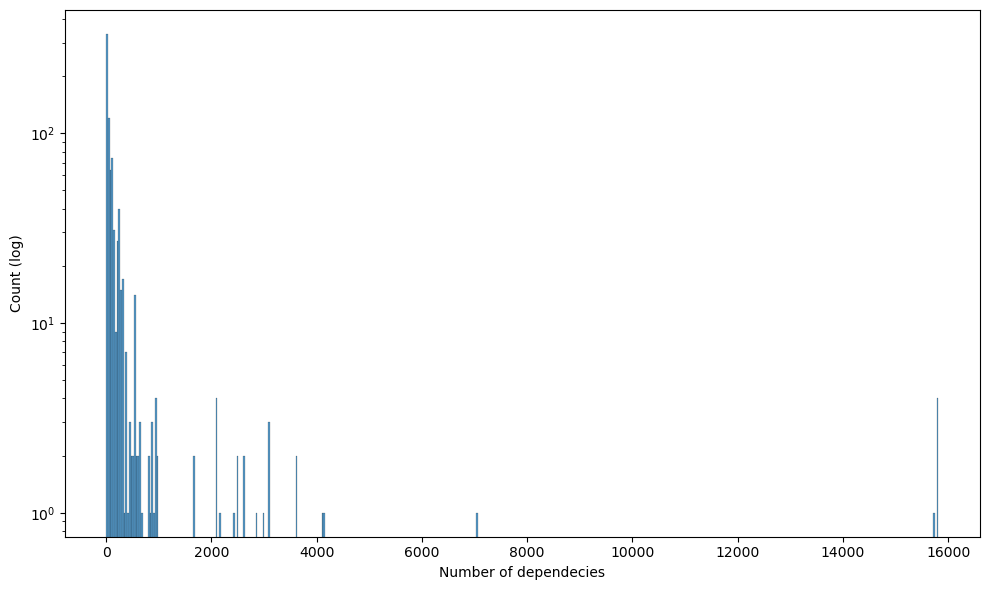

In [12]:
# Stats on deps per project
plt.figure(figsize=(10, 6))
sns.histplot(df.dependencies, kde=False)
plt.xlabel('Number of dependecies')
plt.ylabel('Count (log)')
plt.yscale('log')
plt.tight_layout()
# Show the plot

In [13]:
# Project with max number of deps
maxdeps = df.dependencies.max()
df[df.dependencies == maxdeps].name

36    K2s
37    K2s
39    K2s
40    K2s
Name: name, dtype: object

In [14]:
# Number of projects with no dependencies (it may be good to check why, for example, SBOM declares only License)
len(pd.unique(df[df.dependencies == 0].name))

0

In [15]:
# Empty dependencies for each format. Maybe the fact that there are no deps has something to do with the format rules
df[df.dependencies == 0].groupby('format').size()

Series([], dtype: int64)

In [16]:
# Total dependencies
len(df_detail)

228120

In [17]:
# Unique dependencies
df_detail.name_y.nunique()

25749

In [18]:
# Most used depedencies
df_detail.groupby("name_y").size().reset_index(name="count").sort_values(by=["count"], ascending=False).head(100)

,name_y,count
9530,go.opentelemetry.io/collector/config,888
9651,golang.org/x/sys,867
23518,stdlib,836
23324,source,810
9657,golang.org/x/text,784
...,...,...
9735,google.golang.org/genproto,206
24161,tslib,201
7991,github.com/go-logfmt/logfmt,196
3946,call-bind,195


In [19]:
# Percentage of empty deps
cdx = df[df.format.str.contains("spdx")]
spx = df[df.format.str.contains("cyclonedx")]

print((len(cdx[cdx.dependencies == 0]) / len(cdx)) * 100)
print((len(spx[spx.dependencies == 0]) / len(spx)) * 100)

0.0
0.0


In [20]:
# Number of dependencies ecosystems
df_detail["ecosystem"] = df_detail.location.str.extract(r':([^/]+)/')
df_detail.ecosystem.dropna().value_counts()

ecosystem
golang                 82780
npm                    48845
maven                  36446
deb                    11354
nix                     8481
rpm                     5483
pypi                    4964
cargo                   4260
nuget                   2150
apk                     1225
pub                     1023
github                   722
composer                 359
gem                      253
ACTIONS                   87
cocoapods                 81
generic                   37
oci                       32
githubactions             29
hex                       29
brew                      28
alpine                    18
swid                      15
RUST                      12
github.com                 2
google-code-archive        2
sourceware                 2
Name: count, dtype: int64

In [21]:
# Average number of ecosystem per project
df_detail.dropna(subset=["ecosystem"]).groupby("name_y")['ecosystem'].nunique().describe()

count    21434.000000
mean         1.010404
std          0.119619
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: ecosystem, dtype: float64

# SBOM quality

In [26]:
# SBOM quality stats
df_clean_quality = df[df.quality!=0]
df_clean_quality.quality.describe()

count    786.000000
mean       6.798919
std        1.037448
min        2.830000
25%        6.090000
50%        6.935000
75%        7.390000
max        9.100000
Name: quality, dtype: float64

In [27]:
df_clean_quality.groupby('format').quality.describe()

,count,mean,std,min,25%,50%,75%,max
format,,,,,,,,
cyclonedx_json,341.0,6.819619,1.243340e+00,2.83,5.65,6.95,7.900,9.06
cyclonedx_xml,43.0,7.238605,1.302128e+00,4.78,6.03,7.96,8.235,8.68
spdx_json,318.0,6.841918,6.762868e-01,4.35,6.09,7.32,7.380,8.18
spdx_spdx,23.0,6.955652,1.689868e+00,4.74,5.22,6.91,8.815,9.10
spdx_yaml,61.0,6.090000,2.686648e-15,6.09,6.09,6.09,6.090,6.09


In [28]:
df_clean_quality['extension'] = df_clean_quality.format.apply(lambda x: x.split("_")[1])

/var/folders/kj/6309bkpj25369522dyfd5dxh0000gn/T/ipykernel_52199/213809533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_quality['extension'] = df_clean_quality.format.apply(lambda x: x.split("_")[1])


In [29]:
df_clean_quality['real_format'] = df_clean_quality.format.apply(lambda x: x.split("_")[0])

/var/folders/kj/6309bkpj25369522dyfd5dxh0000gn/T/ipykernel_52199/4285247223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_quality['real_format'] = df_clean_quality.format.apply(lambda x: x.split("_")[0])


In [30]:
df_clean_quality.groupby('real_format').quality.describe()

,count,mean,std,min,25%,50%,75%,max
real_format,,,,,,,,
cyclonedx,384.0,6.866536,1.255297,2.83,5.65,6.95,8.0425,9.06
spdx,402.0,6.734328,0.770305,4.35,6.09,6.47,7.3700,9.10


In [31]:
df_clean_quality.groupby('extension').quality.describe()

,count,mean,std,min,25%,50%,75%,max
extension,,,,,,,,
json,659.0,6.830379,1.009582e+00,2.83,6.09,6.95,7.390,9.06
spdx,23.0,6.955652,1.689868e+00,4.74,5.22,6.91,8.815,9.10
xml,43.0,7.238605,1.302128e+00,4.78,6.03,7.96,8.235,8.68
yaml,61.0,6.090000,2.686648e-15,6.09,6.09,6.09,6.090,6.09


In [32]:
# Project(s) with best quality
max_quality = df_clean_quality.quality.max()
df_clean_quality[df_clean_quality.quality == max_quality].name

264    cve-bin-tool
Name: name, dtype: object

In [34]:
# Project(s) with worst quality
min_quality = df_clean_quality.quality.min()
df_clean_quality[df_clean_quality.quality == min_quality].name

458    hook_tesy
Name: name, dtype: object

# Licenses

In [30]:
# Licenses stats
df.licenses.describe()

count     808.000000
mean       82.587871
std       315.922154
min         0.000000
25%         0.000000
50%         1.000000
75%        34.000000
max      3710.000000
Name: licenses, dtype: float64

In [31]:
# Licenses per format
df[df.dependecies==0].groupby('format').licenses.describe()

AttributeError: 'DataFrame' object has no attribute 'dependecies'

In [ ]:
# SBOM with max Licenses
max = df.licenses.max()
df[df.licenses==max].name

In [ ]:
# SBOM without licenses
len(df[df.licenses==0])

In [ ]:
# Difference between formats for repo without licenses 
df[df.licenses==0].groupby('format').size()

In [ ]:
# Percentage of no licenses by format
print(len(cdx[cdx.licenses==0])/len(cdx) * 100)
print(len(spx[spx.licenses==0])/len(spx) * 100)

In [ ]:
clean_licenses = {
    "LicenseRef-http---www.apache.org-licenses-LICENSE-2.0.txt": "Apache-2.0",
    "LicenseRef-http---www.apache.org-licenses-LICENSE-2.0.txt": "Apache-2.0",
    "LicenseRef-https---www.apache.org-licenses-LICENSE-2.0.txt": "Apache-2.0",
    "LicenseRef-https---www.apache.org-licenses-LICENSE-2.0.txt": "Apache-2.0",
    "LicenseRef-https---www.apache.org-licenses-LICENSE-2.0": "Apache-2.0",
    "https://www.apache.org/licenses/LICENSE-2.0.txt" : "Apache-2.0",
    '"Apache-2.0";link="https://www.apache.org/licenses/LICENSE-2.0.txt"' : "Apache-2.0",
    "Apache License, 2.0" : "Apache-2.0",
    "Apache License 2.0" : "Apache-2.0",
    "Apache License 2" : "Apache-2.0",
    "Apache License, Version 2.0" : "Apache-2.0",
    "Apache License Version 2.0" : "Apache-2.0",
    "Apache 2" : "Apache-2.0",
    "Apache" : "Apache-2.0",
    "Apache Software License": "Apache-2.0",
    "Apache Software License, Version 2.0": "Apache-2.0",
    "Apache-2," : "Apache-2.0",
    'Apache-2.0";link="https://www.apache.org/licenses/LICENSE-2.0.txt",' : "Apache-2.0",
    "Apache Software License, Version 2.0" : "Apache-2.0",
    "Apache 2.0" : "Apache-2.0",
    "LicenseRef-254761b1c99a8b9e7be8f9685ae02656d4912af7bf14f6a9b0ac7102a7b893ea" : "",
    #"LicenseRef-LGPLv2-" : "LGPL-2.0",
    "GPL-2.0-only" : "GPL-2.0",
    "GPL-2.0-or-later": "GPL-2.0",
    "http://www.apache.org/licenses/LICENSE-2.0.txt" : "Apache-2.0",
    "LicenseRef-https--www.apache.org-licenses-LICENSE-2.0": "Apache-2.0",
    "..." : '',
    "Standard 'no charge' license: https://gsap.com/standard-license. Club GSAP members get more: https://gsap.com/licensing/. Why GreenSock doesn't employ an MIT license: https://gsap.com/why-license/" : "GSAP",
    "MIT (http://mootools.net/license.txt)": "MIT",
    "http://www.eclipse.org/legal/epl-2.0, https://www.gnu.org/software/classpath/license.html" : "EPL-2.0",
    "http://creativecommons.org/publicdomain/zero/1.0/, https://opensource.org/licenses/BSD-2-Clause" : "CC0",
    'Paul-Hsieh,': '',
    'JPEG,': '',
    'double-metaphone': '',
    'and/or': '',
    'license,': '',
    'libpng,': '',
    'copy,': '',
    'config-h,': '',
    'of': '',
    'Autoconf,': '',
    'person,': '',
    '2-clause': '',
    'exception,': '',
    'Expat,': '',
    'BSD-3,': '',
    'granted': '',
    'other': '',
    'under': '',
    '/': '',
    'later': '',
    'custom,': '',
    '/usr/share/common-licenses/GPL-2.': '',
    'BSD-2-clause-author,': '',
    'configure': '',
    'double-metaphone,': '',
    'SEE LICENSE IN LICENSE.md': '',
    'copying': '',
    'TEXT-TABS,': '',
    'use,': '',
    'way': '',
    'see': '',
    'SunSoft': '',
    'Unicode-DFS-2016': '',
    'is': '',
    'person': '',
    'GPL-2.0-with-classpath-exception': '',
    'hereby': '',
    'This': '',
    'obtaining,': '',
    'font': '',
    'any': '',
    'licensed': '',
    'for': '',
    'The': '',
    'and' : '',
    'to': '',
    'Lesser,':'',
    'use':'',
    'By': '',
    'Podam runs under the MIT license': 'MIT',
    'MIT License':'MIT',
    'GNU LESSER GENERAL PUBLIC LICENSE 2.1' : 'GLGPL-2.1',
    'AFL-2.1,' : 'AFL-2,1',
    'Public-Domain,':'Public-Domain',
    'http://www.eclipse.org/legal/epl-v10.html, http://www.gnu.org/licenses/old-licenses/lgpl-2.1.html' : "EPL-1.0",
    'http://www.opensource.org/licenses/mit-license.php': "MIT",
    'International Program License Agreement (IPLA)': 'IPLA',
    'GNU LESSER GENERAL PUBLIC LICENSE, version 3 (LGPL-3.0)': 'GLGPL-3.0',
    'GENERAL PUBLIC LICENSE, version 3 (GPL-3.0)': 'GPL-3.0'
}

def fix_license(text):
    if (text != '' and text[-1] == ","):
        text = text[:-1]
    if text in clean_licenses:
        return clean_licenses[text]
    if "LicenseRef-" in text:
        r = list(filter(None, "LicenseRef-GPL-3---BISON-EXCEPTION-".split('-')[1:]))
        return "-".join(r)
    return text

In [ ]:
# Most common license
licenses = df_detail.licenses_y.dropna().str.split("|")
all_licenses = [l for sublist in licenses for l in sublist]

all_licenses = [fix_license(l) for l in all_licenses]

list(filter(None,list(set(all_licenses))))

In [ ]:
all_licenses = [l for l in all_licenses if l and l != 'NONE']
df_license_stats = pd.DataFrame(all_licenses, columns=['license'])
df_license_stats['license'].apply(lambda x: fix_license(x))
license_counts = df_license_stats['license'].value_counts().reset_index()
license_counts.columns = ['license', 'count']
license_counts['percentage'] = (license_counts['count'] / license_counts['count'].sum()) * 100
license_counts.license.unique()

In [ ]:
# Total different unique licenses
len(license_counts)

In [ ]:
# Aggregate licenses with small percentages into 'other' category
threshold = 1  # percentage threshold to consider as 'other'
license_plotting = license_counts.copy()
license_plotting.loc[license_plotting['percentage'] < threshold, 'license'] = 'other'

# Recalculate the counts and percentages
aggregated_counts = license_plotting.groupby('license').agg({'count': 'sum'}).reset_index()
aggregated_counts['percentage'] = (aggregated_counts['count'] / aggregated_counts['count'].sum()) * 100
aggregated_counts = aggregated_counts.sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='license', y='percentage', data=aggregated_counts)
#plt.title('License Percentages (with "other" category)')
plt.xticks(rotation=45)
plt.ylabel('Percentage (%)')
plt.xlabel('License')
plt.show()

# Vulnerabilities

In [ ]:
# Fixing the -1 in the CVE columns
cve_cols = ["critical", "high", "medium", "low"]
df[cve_cols] = df[cve_cols].replace(-1, 0)

In [ ]:
# Stats an all cve
df["cves_count"] = df[cve_cols].sum(axis=1)

In [ ]:
df.cves_count.describe()

In [ ]:
df.groupby('format').cves_count.describe()

In [ ]:
# Project with max CVE
max = df.cves_count.max()
df[df.cves_count==max].name

In [ ]:
# Percentage of repos without CVE
len(df[df.cves_count==0])/len(df) * 100

In [ ]:
# CVE stats by severity
df[cve_cols].describe()

In [ ]:
df_detail['CVEs'].dropna().str.split("|", expand=True).stack().nunique()

In [ ]:
len(df_detail['CVEs'].dropna().str.split("|", expand=True).stack())

In [ ]:
# Split CVEs and Severities
df_severity = df_detail[['CVEs', 'severity']].dropna()
df_severity['CVEs_c'] = df_detail['CVEs'].str.split('|')
df_severity['severity_c'] = df_detail['severity'].str.split('|')

# Initialize a dictionary to count CVEs by severity
severity_counts = {'CRITICAL': Counter(), 'HIGH': Counter(), 'MEDIUM': Counter(), 'LOW': Counter()}

# Iterate through the rows of the DataFrame
for _, row in df_severity.iterrows():
    for cve, severity in zip(row['CVEs_c'], row['severity_c']):
        if severity in severity_counts:
            severity_counts[severity][cve] += 1

# Determine the most occurring CVE for each severity
most_common_cves = {severity: counts.most_common(1)[0] for severity, counts in severity_counts.items() if counts}

# Output the result
most_common_cves

In [ ]:
# Most common CVEs
cves = df_detail['CVEs'].dropna().str.split("|")
all_cves = [c for sublist in cves for c in sublist]
df_cves_stats = pd.DataFrame(all_cves, columns=['cves'])
cves_counts = df_cves_stats['cves'].value_counts().reset_index()
cves_counts.columns = ['cves', 'count']
cves_counts['percentage'] = (cves_counts['count'] / cves_counts['count'].sum()) * 100
#cves_counts[cves_counts.cves.str.contains('2011')]
cves_counts.head(10)

In [ ]:
# Oldest CVE year
cves_counts.cves.str.extract(r'(\d{4})').dropna().min()

In [ ]:
# Top most occurring CWE
cwes = df_detail['CWEs'].dropna().str.split("|")
all_cwes = [cw for sublist in cwes for cw in sublist]
df_cwes_stats = pd.DataFrame(all_cwes, columns=['cwes'])
cwes_counts = df_cwes_stats['cwes'].value_counts().reset_index()
cwes_counts.columns = ['cwes', 'count']
cwes_counts['percentage'] = (cwes_counts['count'] / cwes_counts['count'].sum()) * 100
cwes_counts.head(10)

In [ ]:
# Stats for CWEs associated to each depedendency
cwes.apply(lambda x: len(x)).describe()

In [ ]:
flattened_cwes = [item for sublist in cwes for item in sublist]
print(len(flattened_cwes))
print(len(list(set(flattened_cwes))))

In [ ]:
threshold = 1  # percentage threshold to consider as 'other'
cwes_counts.loc[cwes_counts['percentage'] < threshold, 'cwes'] = 'other'
aggregated_counts = cwes_counts.groupby('cwes').agg({'count': 'sum'}).reset_index()
aggregated_counts['percentage'] = (aggregated_counts['count'] / aggregated_counts['count'].sum()) * 100
aggregated_counts = aggregated_counts.sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='cwes', y='percentage', data=aggregated_counts)
#plt.title('License Percentages (with "other" category)')
plt.xticks(rotation=45)
plt.ylabel('Percentage (%)')
plt.xlabel('CWE category')
plt.show()

In [ ]:
# CVSS severity occurrencies
df_detail.severity.dropna().str.split("|", expand=True).stack().value_counts()

In [ ]:
# CVSS criticality
df_detail.criticality.dropna().str.split("|", expand=True).stack().str.extract(r'CVSS:(\d\.\d)')[0].unique()

# Relationship types

In [ ]:
# Stats about relationship types for each dependency
df_detail.relationship_types.dropna().str.split("|").apply(lambda x: len(x)).describe()

In [ ]:
# Most common relationship types (in %)
relationships = df_detail.relationship_types.dropna().str.split("|", expand=True).stack().str.replace("dependsOn", "DEPENDS_ON").value_counts(normalize=True)*100

In [ ]:
relationships

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(relationships)
plt.xticks(rotation=45)
plt.yscale('log')
plt.xlabel("Relationship type")
plt.ylabel("Count (log)")
plt.tight_layout()